In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras.layers as layers
import ta
import splitSequence as sq

In [2]:
data = pd.read_csv('../inputData/fb.us.txt')

In [3]:
datawInd = ta.add_all_ta_features(data, open = 'Open', high = 'High', low= 'Low', close='Close', volume='Volume', fillna=True)

In [4]:
datawInd.head()

,Date,Open,High,Low,Close,Volume,OpenInt,volume_adi,volume_obv,volume_cmf,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2012-05-18,42.05,45.00,38.00,38.23,580438450,0,-5.422954e+08,580438450,-0.934286,...,50.0,3.285714,3.285714,-96.714286,0.0,38.23,0.0,-54.239587,0.000000,0.000000
1,2012-05-21,36.53,36.66,33.00,34.03,169418988,0,-6.163583e+08,411019462,-0.821967,...,50.0,8.583333,5.934524,-91.416667,0.0,34.03,0.0,-10.986137,-11.637806,-10.986137
2,2012-05-22,32.61,33.59,30.94,31.00,101876406,0,-7.136214e+08,309143056,-0.837846,...,50.0,0.426743,4.098597,-99.573257,0.0,31.00,0.0,-8.903908,-9.325528,-18.911849
3,2012-05-23,31.37,32.50,31.36,32.00,73678512,0,-7.045732e+08,382821568,-0.761361,...,50.0,7.539118,5.516398,-92.460882,0.0,32.00,0.0,3.225806,3.174870,-16.296103
4,2012-05-24,32.95,33.21,31.77,33.03,42560731,0,-6.726526e+08,425382299,-0.694908,...,50.0,14.864865,7.610242,-85.135135,0.0,33.03,0.0,3.218750,3.168034,-13.601883


In [5]:
train, test = sq.timeseriesSplitTestTrain(datawInd)

In [15]:
n_steps = 50
Xtrain = sq.shapeXinputforColumns(np.array(train), n_steps=n_steps, col_indexes=list(range(1, len(datawInd.columns))))
Xtest = sq.shapeXinputforColumns(np.array(test), n_steps=n_steps, col_indexes=list(range(1, len(datawInd.columns))))
ytrain = sq.splitSeqGety(np.array(train)[:,1],n_steps)
ytest = sq.splitSeqGety(np.array(test)[:,1],n_steps)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1055, 50, 73) (226, 50, 73) (1055,) (226,)


In [19]:
input_shape = Xtrain.shape[1:]
input_shape

(50, 73)

In [28]:
model = Sequential()
model.add(LSTM(128, input_shape=(input_shape), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
model.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
#model.compile(optimizer='adam', loss='mse')

In [45]:
model.fit(x= Xtrain, y=ytrain, epochs=30, batch_size=32, use_multiprocessing=True)

Epoch 1/30
1055/1055 [==============================] - 2s 2ms/step - loss: 28.3287
Epoch 2/30
1055/1055 [==============================] - 2s 2ms/step - loss: 32.2711
Epoch 3/30
1055/1055 [==============================] - 2s 2ms/step - loss: 26.8148
Epoch 4/30
1055/1055 [==============================] - 2s 2ms/step - loss: 25.2767
Epoch 5/30
1055/1055 [==============================] - 2s 2ms/step - loss: 25.7870
Epoch 6/30
1055/1055 [==============================] - 2s 2ms/step - loss: 25.0645
Epoch 7/30
1055/1055 [==============================] - 2s 2ms/step - loss: 25.6348
Epoch 8/30
1055/1055 [==============================] - 2s 2ms/step - loss: 30.1476
Epoch 9/30
1055/1055 [==============================] - 2s 2ms/step - loss: 29.5192
Epoch 10/30
1055/1055 [==============================] - 2s 2ms/step - loss: 26.6894
Epoch 11/30
1055/1055 [==============================] - 2s 2ms/step - loss: 24.6022
Epoch 12/30
1055/1055 [==============================] - 2s 2ms/step - los

In [39]:
y_pred = model.predict(Xtest, batch_size=32)
y_pred[:,0].shape

(226,)

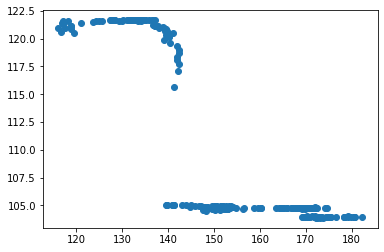

In [42]:
plt.scatter(x=ytest, y=y_pred[:,0])

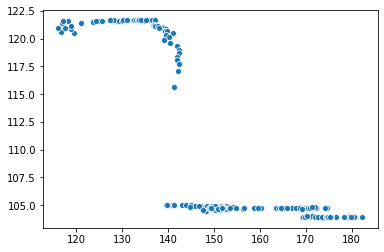

In [44]:
sns.scatterplot(x=ytest, y=y_pred[:,0])